# 动态面积图


### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
import datetime
from IPython.display import HTML

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 让网格线显示在下方
mpl.rc('axes', axisbelow=True)

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

# 防止动态图显示不完整
plt.rcParams['animation.embed_limit'] = 1e100

### 2. 定义数据

In [2]:
# # 当需要更新数据时，去掉注释后运行一次
# import akshare as ak

# # 从 akshare 获取历史数据，速度比较慢
# df_all_history = ak.covid_19_history()

# # 保存到 Excel 文件中，以便下次快速读取数据
# df_all_history.to_excel('./data/covid_history.xlsx')

# 定义想要展示的国家
countries = ['美国']

# 从 Excel 文件中读取数据
df_all = pd.read_excel('./data/covid_history.xlsx', index_col=0).fillna('')

# 将字符串格式的日期转换为日期格式
df_all['date'] = pd.to_datetime(df_all['date'])

# 排除省份的数据，只保留国家的数据，设置日期为索引
dfc = df_all.query("province=='' and country==@countries[0]").set_index('date')

# 添加新增确诊列
dfc['new'] = dfc.confirmed - dfc.confirmed.shift(1).fillna(0)

# 筛选数据
df1 = pd.DataFrame(dfc.new)
df1.columns = [countries[0]]
df1 = df1.fillna(0)
df1= df1[df1.index >= '2020-03-01']

# 总天数
length = df1.shape[0] + 1

# 定义填充面积的颜色
colors = plt.cm.Spectral_r(df1[countries[0]]/max(df1[countries[0]]))

### 3. 开始画图

用「**面向对象**」的方法画图。

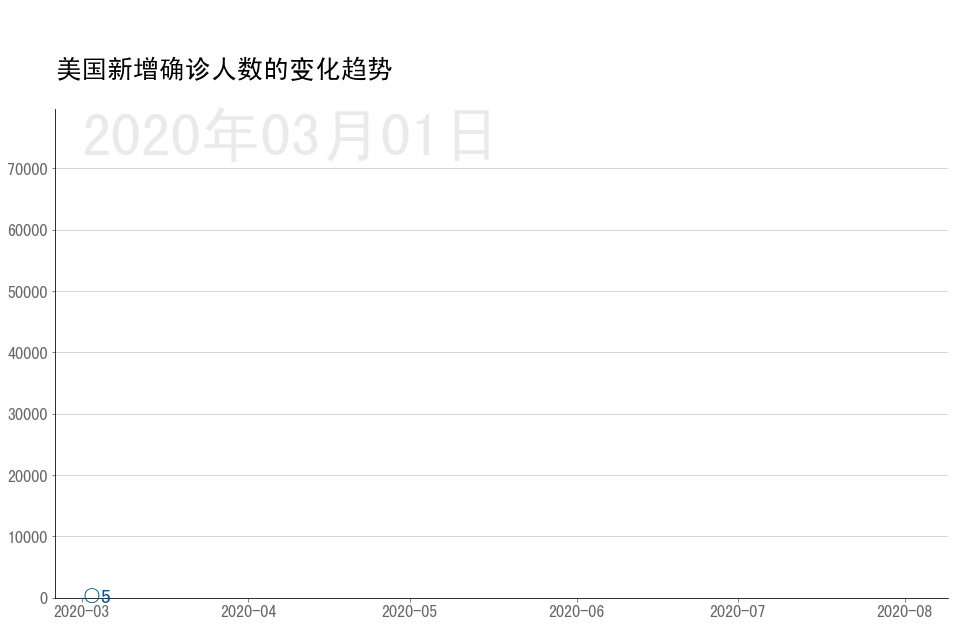

In [5]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(16, 9))

# 设置背景颜色
fig.set_facecolor('w')
ax.set_facecolor('w')

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])

# 定义动画函数
def animate(num): 
    # 先清空画面
    ax.clear()
    
    # 动态显示新的数据
    df_temp = df1.iloc[0:num, :]
    idx = df_temp.index

    # 绘制折线图
    ax.plot(idx, df_temp[countries[0]], color=c['蓝色'], linewidth=3, zorder=2)
    # 用条形图填充为面积图，用不同的颜色表示数值的大小
    ax.bar(idx, df_temp[countries[0]], width=1.5, align='center', color=colors)
    
    string = '○'+str(int(df_temp[countries[0]][-1]))
    ax.text(idx[-1], df_temp[countries[0]][-1], string, size=20, ha='left', va='center', color=c['蓝色'])

    # 设置标题
    ax.set_title('\n\n'+countries[0]+'新增确诊人数的变化趋势\n', loc='left', fontsize=26)
    
    # 设置 X 轴坐标范围
    ax.set_xlim(df1.index[0]+datetime.timedelta(days=-5), df1.index[-1]+datetime.timedelta(days=5))
    
    # 设置 Y 轴坐标范围
    ax.set_ylim(0, max(df1[countries[0]]))
    
    # 图片背景显示日期的动态变化
    ymax = ax.get_ylim()[1]
    string = (df1.index[0]+datetime.timedelta(days=int(num-1))).strftime('%Y年%m月%d日')
    ax.text(df1.index[0], ymax, string, ha='left', va='top', fontsize=60, color=c['灰色'], zorder=-1, alpha=0.2)
    
    # 设置网络线
    ax.grid(axis='y', color=c['浅灰色'])
    
    
# 绘制动画
animator = animation.FuncAnimation(fig, animate, frames=np.arange(1, length, 1), interval=100)

# 在 Jupyter Notebook 中显示动画
# HTML(animator.to_jshtml())

# 保存为 mp4 的文件格式
animator.save('动态面积图.mp4')